In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_items = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [3]:
# Load the MNIST Fashion Dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

In [5]:
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [6]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
# Compile and train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:
model.fit(train_images, train_labels, epochs=10, batch_size=64, verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


938/938 [==============================] - 69s 72ms/step - loss: 0.5422 - accuracy: 0.8017
Epoch 2/10
938/938 [==============================] - 59s 63ms/step - loss: 0.3412 - accuracy: 0.8769
Epoch 3/10
938/938 [==============================] - 61s 65ms/step - loss: 0.2919 - accuracy: 0.8934
Epoch 4/10
938/938 [==============================] - 57s 61ms/step - loss: 0.2606 - accuracy: 0.9047
Epoch 5/10
938/938 [==============================] - 59s 63ms/step - loss: 0.2370 - accuracy: 0.9129
Epoch 6/10
938/938 [==============================] - 58s 62ms/step - loss: 0.2209 - accuracy: 0.9187
Epoch 7/10
938/938 [==============================] - 59s 63ms/step - loss: 0.2046 - accuracy: 0.9240
Epoch 8/10
938/938 [==============================] - 57s 61ms/step - loss: 0.1885 - accuracy: 0.9303
Epoch 9/10
938/938 [==============================] - 58s 62ms/step - loss: 0.1735 - accuracy: 0.9354
Epoch 10/10
938/938 [==============================] - 60s 64ms/step - loss: 0.1614 - accurac

In [9]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.90420001745224


In [10]:
# Predict the labels for the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 4s 12ms/step


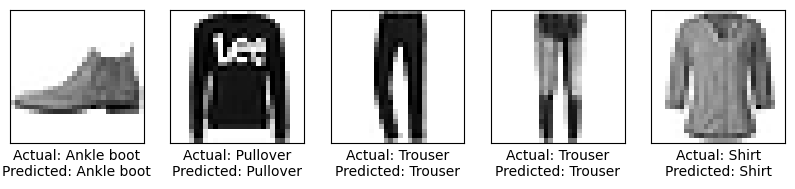

In [11]:
# Display five example images with actual and predicted labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
    actual_label = fashion_items[test_labels[i]]
    predicted_label = fashion_items[predicted_labels[i]]
    plt.xlabel(f"Actual: {actual_label}\nPredicted: {predicted_label}")
plt.show()